# 01.탐색적 데이터 분석:

### 01-1데이터 둘러보기

In [2]:
import numpy as np
import pandas as pd

data_path = '/kaggle/input/bike-sharing-demand/'

train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')

submission = pd.read_csv(data_path + 'sampleSubmission.csv')

In [3]:
train.shape,test.shape

((10886, 12), (6493, 9))

In [4]:
#train과 test의 피처 알아보기
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
test.head() #훈련 데이터에서도 casual과 registered 피처 제외한다 #count를 예측하는 것.

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [6]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


예측해야 할 것: 시간당 총 자전거 대여 수량

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


### 01-2 데이터 시각화 및 피처 엔지니어링

대략적인 분석 마쳤으면 이제 데이터 시각화 차례 + 피처 엔지니어링

datetime은 object, 즉 문자열 타입이라 이를 날짜, 시간 등으로 나눈다(공백을 기준)

In [8]:
print(train['datetime'][100].split()[0].split('-'))

['2011', '01', '05']


In [9]:
print(train['datetime'][100].split()[0])
print(train['datetime'][100].split()[0].split("-"))
print(train['datetime'][100].split()[0].split("-")[0])#연도
print(train['datetime'][100].split()[0].split("-")[1])#월
print(train['datetime'][100].split()[0].split("-")[2])#일

2011-01-05
['2011', '01', '05']
2011
01
05


In [10]:
print(train['datetime'][100].split()[1])
print(train['datetime'][100].split()[1].split(":"))
print(train['datetime'][100].split()[1].split(":")[0])#시간
print(train['datetime'][100].split()[1].split(":")[1])#분
print(train['datetime'][100].split()[1].split(":")[2])#초

09:00:00
['09', '00', '00']
09
00
00


apply() 함수로 날짜, 연도 등등 생성

apply는 2차원 타입의 데이터에서 행/열 또는 전체에 원하는 연산을 지원한다.

In [11]:
train['date'] = train['datetime'].apply(lambda x: x.split()[0])

train['year'] = train['datetime'].apply(lambda x: x.split()[0].split("-")[0])
train['month'] = train['datetime'].apply(lambda x: x.split()[0].split("-")[1])
train['day'] = train['datetime'].apply(lambda x: x.split()[0].split("-")[2])
train['hour'] = train['datetime'].apply(lambda x: x.split()[1].split(":")[0])
train['minute'] = train['datetime'].apply(lambda x: x.split()[1].split(":")[1])
train['second'] = train['datetime'].apply(lambda x: x.split()[1].split(":")[2])

요일피처 생성

In [12]:
from datetime import datetime
import calendar

In [13]:
print(train['date'][100])#날짜
print(datetime.strptime(train['date'][100], '%Y-%m-%d'))

#정수로 요일 변환: 0은 월요일, 1은 화요일 등등
print(datetime.strptime(train['date'][100],'%Y-%m-%d').weekday()) 
#문자로 요일 변환
calendar.day_name[datetime.strptime(train['date'][100],'%Y-%m-%d').weekday()]

2011-01-05
2011-01-05 00:00:00
2


'Wednesday'

In [14]:
train['weekday'] = train['date'].apply(lambda dateString: calendar.day_name[datetime.strptime(dateString,'%Y-%m-%d').weekday()])

In [15]:
train.head()
#이제 season과 weather map으로 문자열로 변환 후 시각화 해보자

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


In [16]:
train['season'] = train['season'].map({1:'Spring',
                                       2:'Summer',
                                      3:'Fall',
                                      4:'Winter'})
train['weather'] = train['weather'].map({1:'Clear',
                                        2:'Mist,Few clouds',
                                        3:'Light Snow, Rain, Thunderstrom',
                                        4:'Heavy Rain, Thunderstorm, Sonw, Fog'})
#map(함수,데이터)

In [17]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


분석 결과:
    
date, month 피처 제거하자

season이 month 상위호환한다

### **데이터 시각화**

In [18]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

분포도: 수치형 데이터의 집계값 나타내는 그래프

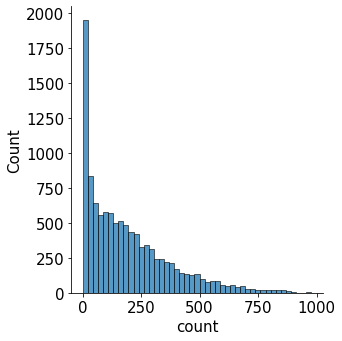

In [19]:
mpl.rc('font',size=15)
sns.displot(train['count'])

회귀 모델이 좋은 값을 내려면 타깃값이 정규분포를 따라야 한다. >> 로그변환 수행

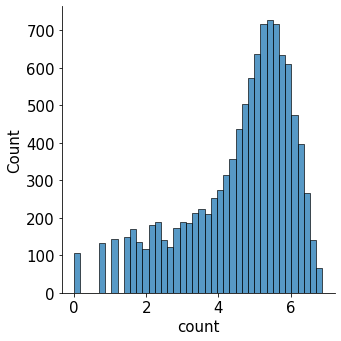

In [20]:
#target값인 count가 정규분포를 따르지 않아 로그변환 수행
sns.displot(np.log(train['count']))

### 막대그래프

범주형 데이터 값에 따라 수치형 데이터 값이 어떻게 달라지는지 알려준다.

In [21]:
#각 범주형 데이터, 연도, 시간 등을 그려보자
plt.tight_layout() #그래프 사이 여백 확보
figure.set_size_inches(10,9) #전체 figure크기 10x9인치로 설정.


NameError: name 'figure' is not defined

<Figure size 432x288 with 0 Axes>

In [ ]:
mpl.rc('font',size = 11) #폰트 크기 설정
mpl.rc('axes',titlesize = 15) #각 축의 제목 크기 설정
figure,axes = plt.subplots(nrows=3,ncols=2) #3행 2열
plt.tight_layout() #그래프 사이 여백 확보
figure.set_size_inches(10,9) #전체 figure크기 10x9인치로 설정.

sns.barplot(x='year',y='count',data=train,ax=axes[0,0])
sns.barplot(x='month',y='count',data=train,ax=axes[0,1])
sns.barplot(x='day',y='count',data=train,ax=axes[1,0])
sns.barplot(x='hour',y='count',data=train,ax=axes[1,1])
sns.barplot(x='minute',y='count',data=train,ax=axes[2,0])
sns.barplot(x='second',y='count',data=train,ax=axes[2,1])

#1행에 위치한 서브플롯들의 x출 라벨 90도 회전
axes[1,0].tick_params(axis = 'x',labelrotation = 90)
axes[1,1].tick_params(axis = 'x',labelrotation = 90)

#### 박스플롯

범주형 데이터에 따른 수치형 데이터 정보

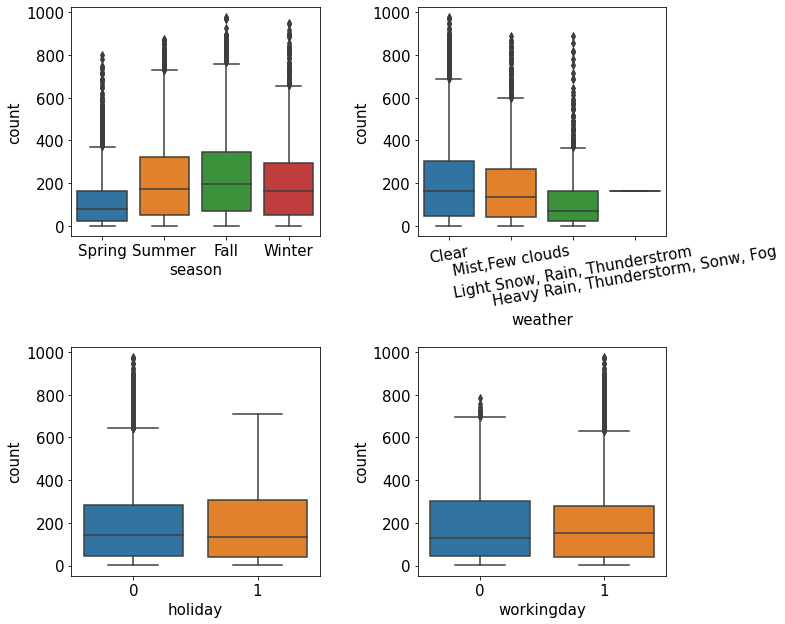

In [22]:
figure, axes = plt.subplots(nrows=2,ncols=2)
plt.tight_layout()
figure.set_size_inches(10,10)

sns.boxplot(x='season',y='count',data=train,ax=axes[0,0])
sns.boxplot(x='weather',y='count',data=train,ax=axes[0,1])
sns.boxplot(x='holiday',y='count',data=train,ax=axes[1,0])
sns.boxplot(x='workingday',y='count',data=train,ax=axes[1,1])
axes[0,1].tick_params(axis='x',labelrotation=10)

- 계절별 대여 수랴이 봄에 가장 적고 가을에 가장 많다

- 날씨별 대여 수량은 날이 좋을 때 많다

- 공휴일이 아닐 때 이상치가 많다

#### 포인트플랏

범주형 데이터에 따른 수치형 데이터의 평균과 신뢰구간 제공, 막대그래프와 동일하지만 더 보기 편하다

<AxesSubplot:xlabel='hour', ylabel='count'>

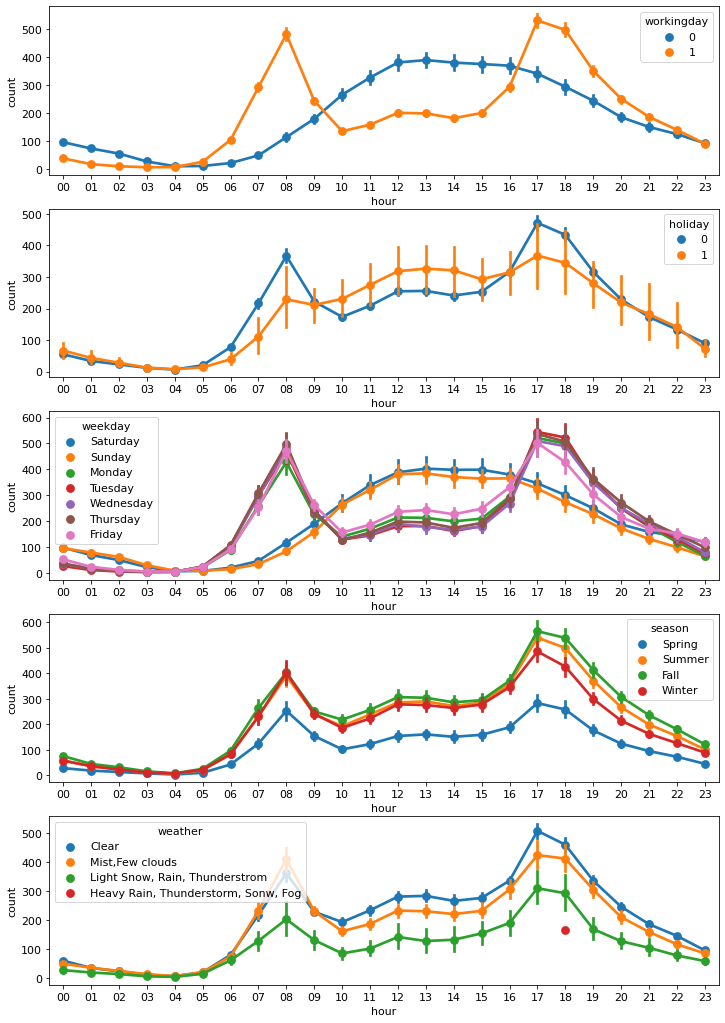

In [23]:
mpl.rc('font',size=11)
figure,axes = plt.subplots(nrows=5)
figure.set_size_inches(12,18)

sns.pointplot(x='hour',y='count',data=train,hue = 'workingday',ax=axes[0])
sns.pointplot(x='hour',y='count',data=train,hue = 'holiday',ax=axes[1])
sns.pointplot(x='hour',y='count',data=train,hue = 'weekday',ax=axes[2])
sns.pointplot(x='hour',y='count',data=train,hue = 'season',ax=axes[3])
sns.pointplot(x='hour',y='count',data=train,hue = 'weather',ax=axes[4])


분석결과 weather ==4인 그래프 제거하는 것이 더 낫겠다. 이상치가 너무 이상하게 나왔다.

### 회귀선을 포함한 산점도 그래프

수치형 데이터인 온도, 체감온도, 풍속, 습도별 대여 수량을 산점도 그래프고 그려보자

<AxesSubplot:xlabel='humidity', ylabel='count'>

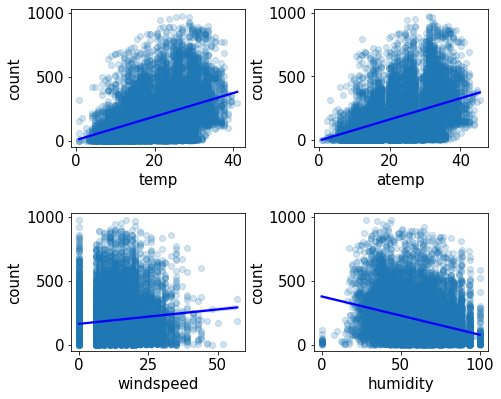

In [24]:
mpl.rc('font',size=15)
figure,axes = plt.subplots(nrows=2,ncols=2)
plt.tight_layout()
figure.set_size_inches(7,6)

#스텝2: 서브플롯 할당
sns.regplot(x='temp',y='count',data=train,ax=axes[0,0],scatter_kws={'alpha':0.2},line_kws = {'color':'blue'})
sns.regplot(x='atemp',y='count',data=train,ax=axes[0,1],scatter_kws={'alpha':0.2},line_kws = {'color':'blue'})
sns.regplot(x='windspeed',y='count',data=train,ax=axes[1,0],scatter_kws={'alpha':0.2},line_kws = {'color':'blue'})
sns.regplot(x='humidity',y='count',data=train,ax=axes[1,1],scatter_kws={'alpha':0.2},line_kws = {'color':'blue'})
#scatter_kws: 산점도 그래프의 점의 투명도

온도와 체감온도가 높을수록 대여수량이 많고 습도가 낮을수록 대여 많이 한다

windspeed 데이터에 0 값으 너무 많아 결측치가 많다고 판단, 그냥 날려버리자

히트맵, 수치형 데이터끼리 어떤 상관관계 있는지 반환

In [25]:
train[['temp','atemp','humidity','windspeed','count']].corr()

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


[Text(0.5, 1.0, 'Heatmap of Numerical Data')]

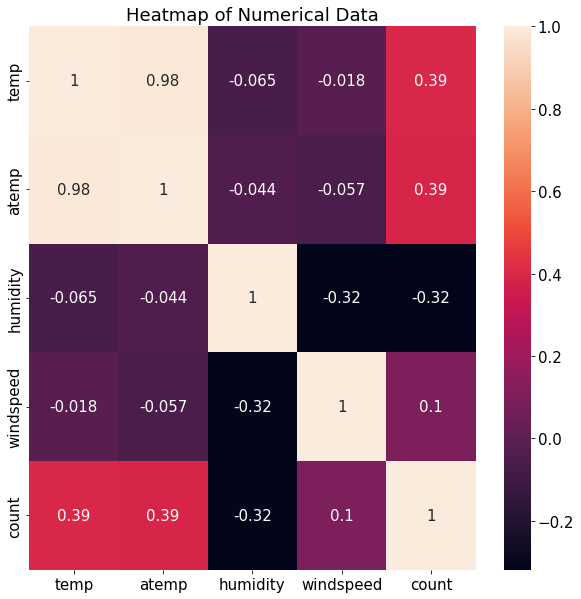

In [26]:
corrMat = train[['temp','atemp','humidity','windspeed','count']].corr()
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(corrMat,annot=True) #annot: 상관계수 숫자로
ax.set(title='Heatmap of Numerical Data')

# 02.베이스라인모델

기본 선형회귀 모델을 베이스라인으로 해보자

#### 피처 엔지니어링

피처 엔지니어링은 데이터 변환 시 훈련 데이터와 테스트 데이터에 공통으로 반영해야 하기 때문에 두 데이터 합쳤다 나눔

그 전에 훈련데이터 weather 4 데이터 제거

In [27]:
data_path = '/kaggle/input/bike-sharing-demand/'

train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')

submission = pd.read_csv(data_path + 'sampleSubmission.csv')

In [29]:
train = train[train['weather'] != 4]
train['weather'].unique()

array([1, 2, 3])

데이터 합치기

In [31]:
all_data = pd.concat([train,test],ignore_index=True)
all_data
#ignore_index를 통해 원래 인덱스 무시하고 처음부터 끝까지 나타냄

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17373,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17374,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17375,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17376,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


In [33]:
from datetime import datetime
#피처 추가

all_data['date'] = all_data['datetime'].apply(lambda x: x.split()[0])
all_data['datetime'] = pd.to_datetime(all_data['datetime'])
all_data['year'] = all_data['datetime'].dt.year
all_data['month'] = all_data['datetime'].dt.month
all_data['hour'] = all_data['datetime'].dt.hour
all_data['weekday'] = all_data['datetime'].dt.weekday #요일

In [34]:
drop_features = ['casual','registered','datetime','date','month','windspeed']

all_data = all_data.drop(drop_features,axis=1)

In [35]:
all_data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,count,year,hour,weekday
0,1,0,0,1,9.84,14.395,81,16.0,2011,0,5
1,1,0,0,1,9.02,13.635,80,40.0,2011,1,5
2,1,0,0,1,9.02,13.635,80,32.0,2011,2,5
3,1,0,0,1,9.84,14.395,75,13.0,2011,3,5
4,1,0,0,1,9.84,14.395,75,1.0,2011,4,5


 모든 피처 엔지니어링 적용했으므로 훈련데이터와 테스트 데이터로 다시 나눈다.

In [36]:
X_train = all_data[~pd.isnull(all_data['count'])] #~: not의미, 즉, all_data['count']가 null이 아니면 훈련 데이터이다. ~는 부정을 의미
X_test = all_data[pd.isnull(all_data['count'])]

#타깃값 제거
X_train = X_train.drop(['count'],axis=1)
X_test = X_test.drop(['count'],axis = 1)

y = train['count']

In [37]:
X_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,year,hour,weekday
0,1,0,0,1,9.84,14.395,81,2011,0,5
1,1,0,0,1,9.02,13.635,80,2011,1,5
2,1,0,0,1,9.02,13.635,80,2011,2,5
3,1,0,0,1,9.84,14.395,75,2011,3,5
4,1,0,0,1,9.84,14.395,75,2011,4,5


In [38]:
X_test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,year,hour,weekday
10885,1,0,1,1,10.66,11.365,56,2011,0,3
10886,1,0,1,1,10.66,13.635,56,2011,1,3
10887,1,0,1,1,10.66,13.635,56,2011,2,3
10888,1,0,1,1,10.66,12.880,56,2011,3,3
10889,1,0,1,1,10.66,12.880,56,2011,4,3


### 평가지표 계산 함수 작성: RMSLE로 하자

In [46]:
import numpy as np

def rmsle(y_true,y_pred,convertExp = True):
    
    if convertExp: #지수변환
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)
        
        #RMSLE 계산
    log_true = np.nan_to_num(np.log(y_true+1)) #log변환 후 결측값 0으로 변환
    log_pred = np.nan_to_num(np.log(y_pred+1))
    
    output = np.sqrt(np.mean((log_true - log_pred)**2))
    return output

### 모델 훈련 1: 릿지 회귀 모델로 임포트하여 생성

릿지 회귀 모델: L2 규제 적용

단순히 선형 회귀 모델보다 과대적합이 적다

하이퍼 파라미터 최적화 진행해보자: GridSearch, cross-validation 사용

In [44]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

ridge_model = Ridge()

In [41]:
#그리드 서치 객체 생성

LinearRegression()

릿지 회귀: L2규제, 사용 빈도는 낮다.
    alpha * W^2과 같이 W의 제곱에 대해 페널티 부여

하이퍼파라미터 튜닝: Grid Search로
    
1. Grid Search: 하이퍼 파라미터를 순차적으로 변경하며 최소 성능 찾기, but 오래걸릴 수 있다

In [47]:
ridge_params = {'max_iter':[3000],'alpha':[0.1,1,2,3,4,10,30,100,200,300,400,800,900,1000]}

#교차 검증용 평가 함수
rmsle_scorer = metrics.make_scorer(rmsle,greater_is_better= False)

#GridSearch 객체 생성
gridsearch_ridge_model = GridSearchCV(estimator = ridge_model, param_grid = ridge_params, scoring=rmsle_scorer,cv=5)

#scoring에서는 mertics.make_scorer을 활용해 별도로 평가지표를 만든다.

GridSearchCV() 함수의 주요 파라미터:

estimator: 분류 및 회귀 모델

param_grid: 여러 하이퍼파라미터 값 지정

scoring: 

cv: 교차 검증 분할 개수

In [48]:
#그리드서치 수행

log_y = np.log(y)
gridsearch_ridge_model.fit(X_train,log_y) #그리드서치 훈련

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400,
                                   800, 900, 1000],
                         'max_iter': [3000]},
             scoring=make_scorer(rmsle, greater_is_better=False))

In [49]:
print('최적 하이퍼 파라미터:',gridsearch_ridge_model.best_params_)

최적 하이퍼 파라미터: {'alpha': 0.1, 'max_iter': 3000}


#성능 검증
그리드서치 완료 후 그리드서치 객체의 best_estimator_ 속성에 최적 예측기 저장

In [51]:
#예측
preds = gridsearch_ridge_model.best_estimator_.predict(X_train)
#그리드서치의 best_estimator_ 속성에 최적 예측기 저장되어 있다.

#평가
print(f'릿지 회귀 RMSLE 값: {rmsle(log_y,preds,True):.4f}')

릿지 회귀 RMSLE 값: 1.0205


### 모델 2: 랜덤 포레스트 회귀 모델

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
randomforest_model = RandomForestRegressor() #모델 생성

rf_params = {'random_state':[42],'n_estimators':[100,120,140]} #그리드서치 객체 생성

gridsearch_random_forest_model = GridSearchCV(estimator = randomforest_model, param_grid=rf_params,scoring=rmsle_scorer,cv=5)

In [54]:
log_y = np.log(y)
gridsearch_random_forest_model.fit(X_train,log_y)
#그리드서치 수행

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [100, 120, 140], 'random_state': [42]},
             scoring=make_scorer(rmsle, greater_is_better=False))

In [55]:
preds = gridsearch_random_forest_model.best_estimator_.predict(X_train)

print(rmsle(log_y,preds,True))
print(preds)

0.11264019266568824
[2.9235532  3.42939426 3.22245824 ... 5.18536771 4.9158254  4.52919602]


가장 best로 좋게 나온다

### 예측 및 결과 제출

훈련 데이터와 테스트 데이터의 분포 확인

<AxesSubplot:ylabel='Count'>

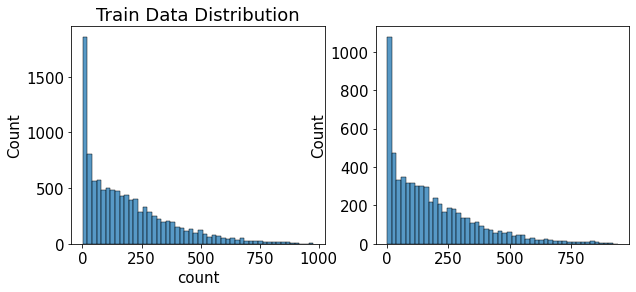

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

randomforest_preds = gridsearch_random_forest_model.best_estimator_.predict(X_test)

figure,axes = plt.subplots(ncols = 2)
figure.set_size_inches(10,4)

sns.histplot(y,bins=50,ax=axes[0])
axes[0].set_title('Train Data Distribution')
sns.histplot(np.exp(randomforest_preds),bins=50,ax=axes[1])

#훈련데이터와 테스트 데이터 타깃값이 비슷하다

In [57]:
submission['count'] = np.exp(randomforest_preds)

submission.to_csv('submission.csv',index=False)